# Analysis of Income Data

###### 

In [1]:
# pip install squarify

In [2]:
import matplotlib.pyplot as plt             
from tabulate import tabulate               
import matplotlib as mat                     
import seaborn as sns                       
import pandas as pd                         
import numpy as np  

In [3]:
data = pd.read_excel("DS1_C5_S1_Income_Data_Challenge.xlsx")

###### 

## TASK - 1 :

### Display the basic information about the dataset, which includes all the columns with the data type of the columns. Also,display the count of missing values for each column.

#### No of Rows and columns in Data.

In [4]:
data.shape

(32561, 11)

#### First five columns 

In [5]:
data.head()

,Age,WorkClass,Education,Education_Num,Marital_Status,Occupation,Relationship,Gender,Hours_Per_Week,Native_Country,Income_Bracket
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,40,United-States,<=50K
1,50,Self-emp,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,40,Cuba,<=50K


#### Last five columns

In [6]:
data.tail()

,Age,WorkClass,Education,Education_Num,Marital_Status,Occupation,Relationship,Gender,Hours_Per_Week,Native_Country,Income_Bracket
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,Female,38,United-States,<=50K
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,Male,40,United-States,>50K
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,Female,40,United-States,<=50K
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,Male,20,United-States,<=50K
32560,52,Self-emp,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,Female,40,United-States,>50K


#### Information About data

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   WorkClass       32561 non-null  object
 2   Education       32561 non-null  object
 3   Education_Num   32561 non-null  int64 
 4   Marital_Status  32561 non-null  object
 5   Occupation      32561 non-null  object
 6   Relationship    32561 non-null  object
 7   Gender          32561 non-null  object
 8   Hours_Per_Week  32561 non-null  int64 
 9   Native_Country  32561 non-null  object
 10  Income_Bracket  32561 non-null  object
dtypes: int64(3), object(8)
memory usage: 2.7+ MB


#### Missing values in each column

In [8]:
data.isnull().sum()

Age               0
WorkClass         0
Education         0
Education_Num     0
Marital_Status    0
Occupation        0
Relationship      0
Gender            0
Hours_Per_Week    0
Native_Country    0
Income_Bracket    0
dtype: int64

#### Data types of each column

In [9]:
data.dtypes

Age                int64
WorkClass         object
Education         object
Education_Num      int64
Marital_Status    object
Occupation        object
Relationship      object
Gender            object
Hours_Per_Week     int64
Native_Country    object
Income_Bracket    object
dtype: object

###### 

## TASK - 2 :

### Create two different lists categorical columns and numerical columns by defining a function to Identify the data type.

In [10]:
data["Education"].dtypes

dtype('O')

In [11]:
def data_type(data):
    categorical = []
    numerical = []
    for i in data.columns:
        if data[i].dtypes != 'O':
            numerical.append(i)
        else:
            categorical.append(i)
            
    return categorical, numerical

categorical, numerical = data_type(data)
        

In [12]:
categorical

['WorkClass',
 'Education',
 'Marital_Status',
 'Occupation',
 'Relationship',
 'Gender',
 'Native_Country',
 'Income_Bracket']

In [13]:
numerical

['Age', 'Education_Num', 'Hours_Per_Week']

###### 

## TASK - 3 :

### Define a function to find the unique values and mode value from each categorical column (identified in Task 2). Aslo, check for the missing values and perform missing value treatment, if required.

In [14]:
data = data.drop(data[data["Occupation"]==" ?"].index)

In [15]:
def cat_info(a):
    if data[a].isnull().sum() > 0:
        mode_value = data[a].mode()[0]
        data[a].fillna(mode_value, inplace=True)

    print(f"The number of categories in {a} : {data[a].unique()}")
    print()
    print(f"The mode of {a} : {data[a].mode()[0]}")
    print(f"Missing values in {a} are : {data[a].isnull().sum()}")

In [16]:
cat_info("WorkClass")

The number of categories in WorkClass : [' State-gov' 'Self-emp' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp' ' Without-pay']

The mode of WorkClass :  Private
Missing values in WorkClass are : 0


In [17]:
cat_info("Education")

The number of categories in Education : [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' Preschool' ' 12th' ' 1st-4th']

The mode of Education :  HS-grad
Missing values in Education are : 0


In [18]:
cat_info("Marital_Status")

The number of categories in Marital_Status : [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']

The mode of Marital_Status :  Married-civ-spouse
Missing values in Marital_Status are : 0


In [19]:
cat_info("Occupation")

The number of categories in Occupation : [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']

The mode of Occupation :  Prof-specialty
Missing values in Occupation are : 0


In [20]:
cat_info("Relationship")

The number of categories in Relationship : [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']

The mode of Relationship :  Husband
Missing values in Relationship are : 0


In [21]:
cat_info("Gender")

The number of categories in Gender : [' Male' ' Female']

The mode of Gender :  Male
Missing values in Gender are : 0


In [22]:
cat_info("Native_Country")

The number of categories in Native_Country : [' United-States' ' Cuba' ' Jamaica' ' India' ' ?' ' Mexico'
 ' Puerto-Rico' ' Honduras' ' England' ' Canada' ' Germany' ' Iran'
 ' Philippines' ' Poland' ' Columbia' ' Cambodia' ' Thailand' ' Ecuador'
 ' Laos' ' Taiwan' ' Haiti' ' Portugal' ' Dominican-Republic'
 ' El-Salvador' ' France' ' Guatemala' ' Italy' ' China' ' South' ' Japan'
 ' Yugoslavia' ' Peru' ' Outlying-US(Guam-USVI-etc)' ' Scotland'
 ' Trinadad&Tobago' ' Greece' ' Nicaragua' ' Vietnam' ' Hong' ' Ireland'
 ' Hungary' ' Holand-Netherlands']

The mode of Native_Country :  United-States
Missing values in Native_Country are : 0


In [23]:
cat_info("Income_Bracket")

The number of categories in Income_Bracket : [' <=50K' ' >50K']

The mode of Income_Bracket :  <=50K
Missing values in Income_Bracket are : 0


###### 

## TASK - 4 :

### Perform descriptive analysis of the categorical columns (Identified in Task 2) with the help of univariate graphs/charts. 

In [24]:
import squarify

### Work Class

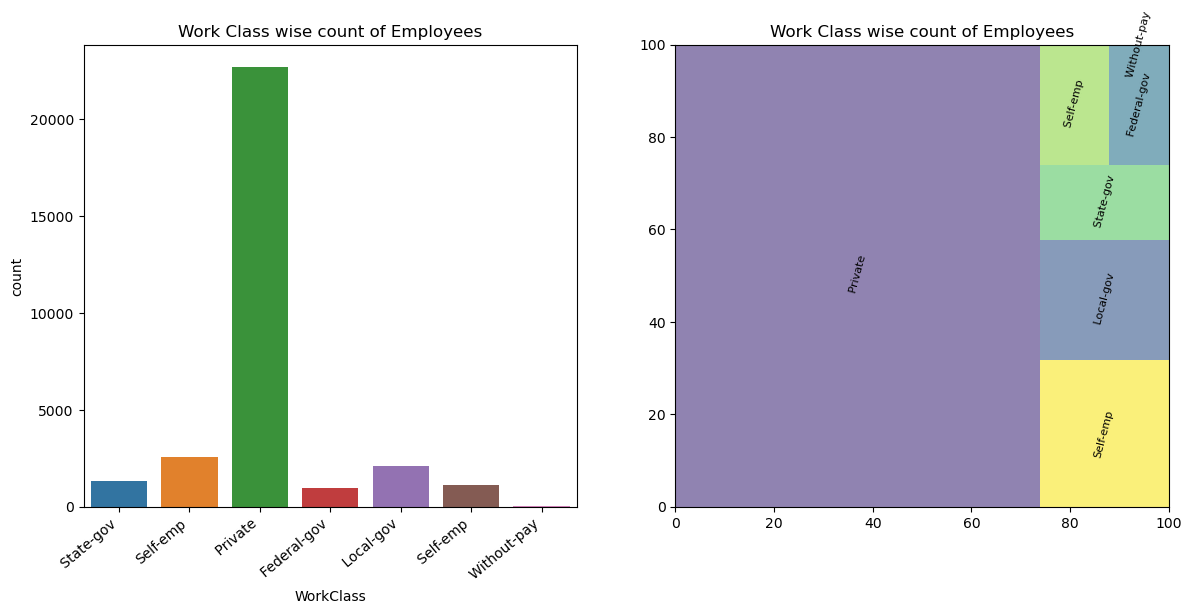

In [25]:
fig, ax = plt.subplots(1,2,figsize = (14, 6))

ax[0].set_title("Work Class wise count of Employees")
ax[1].set_title("Work Class wise count of Employees")

percentage = data["WorkClass"].value_counts()         
labels = (data["WorkClass"].value_counts().index).to_list()

sns.countplot(x = data["WorkClass"], ax = ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 40, horizontalalignment='right')
squarify.plot(sizes=percentage, label=labels, ax=ax[1], alpha=0.6, text_kwargs={'fontsize': 8, 'rotation': 75})
plt.show()

### ***Interpretation : Approximately 70% of employees work in the private sector, while only 13% are employed in state, federal, and local government sectors. Additionally, 8% of employees are self-employed.

###### `

### Education

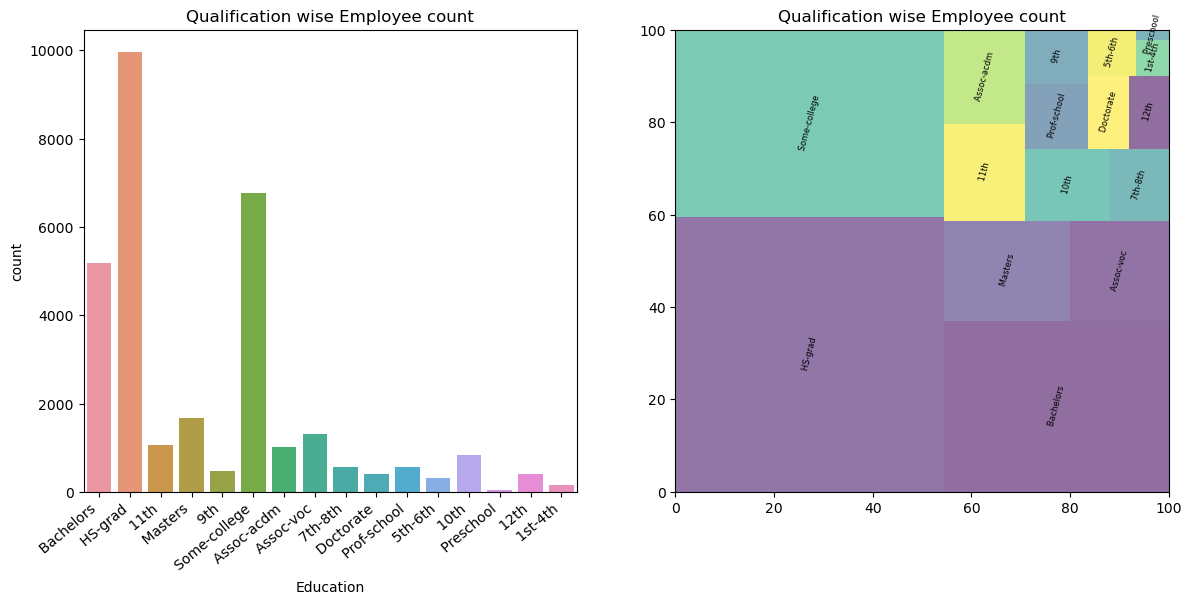

In [26]:
fig, ax = plt.subplots(1,2,figsize = (14, 6))

ax[0].set_title("Qualification wise Employee count")
ax[1].set_title("Qualification wise Employee count")

percentage = data["Education"].value_counts()         
labels = (data["Education"].value_counts().index).to_list()

sns.countplot(x = data["Education"], ax = ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 40, horizontalalignment='right')
squarify.plot(sizes=percentage, label=labels, ax=ax[1], alpha=0.6, text_kwargs={'fontsize': 6, 'rotation': 75})
plt.show()

### *** Interpretation : 32% have a HS-grad educational background, 22% have completed some college, and 17% hold a bachelor's degree. The remaining employees come from various other educational fields.

###### 

### Marital Status

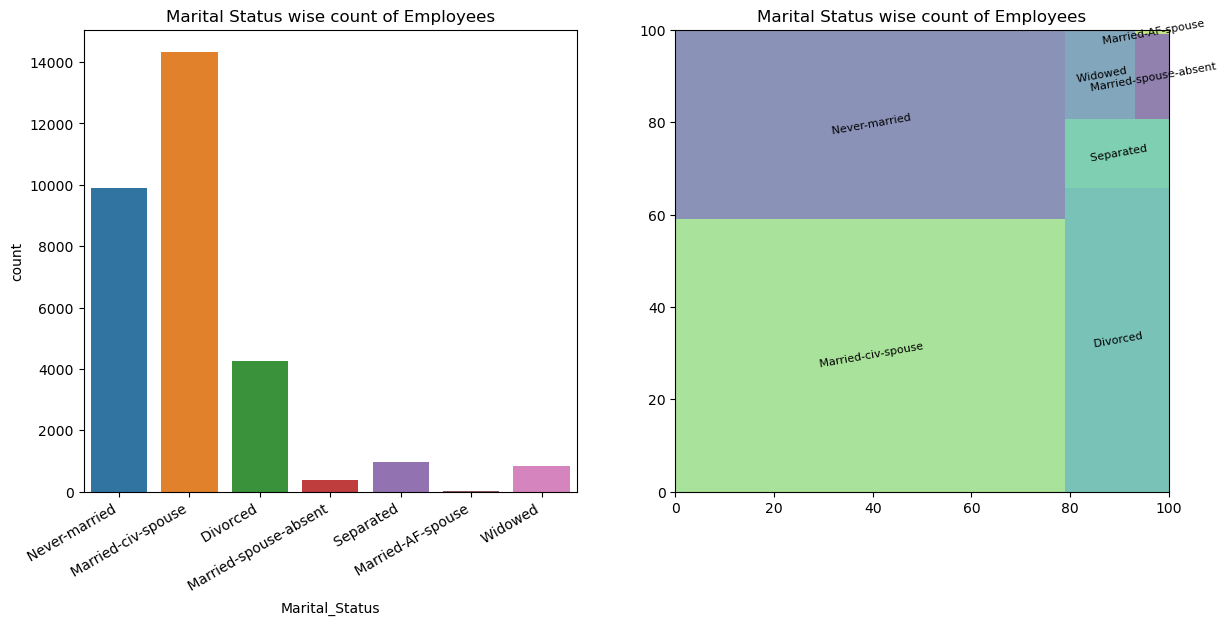

In [27]:
fig, ax = plt.subplots(1,2,figsize = (14, 6))

ax[0].set_title("Marital Status wise count of Employees")
ax[1].set_title("Marital Status wise count of Employees")

percentage = data["Marital_Status"].value_counts()         
labels = (data["Marital_Status"].value_counts().index).to_list()

sns.countplot(x = data["Marital_Status"], ax = ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 30, horizontalalignment='right')
squarify.plot(sizes=percentage, label=labels, ax=ax[1], alpha=0.6, text_kwargs={'fontsize': 8, 'rotation': 10})
plt.show()

### *** Interpretation : 46% of employees are married, 33% are still single, and 14% are divorced. The remaining 7% of employees are either separated, widowed, or married to an AF spouse.

###### 

### Occupation

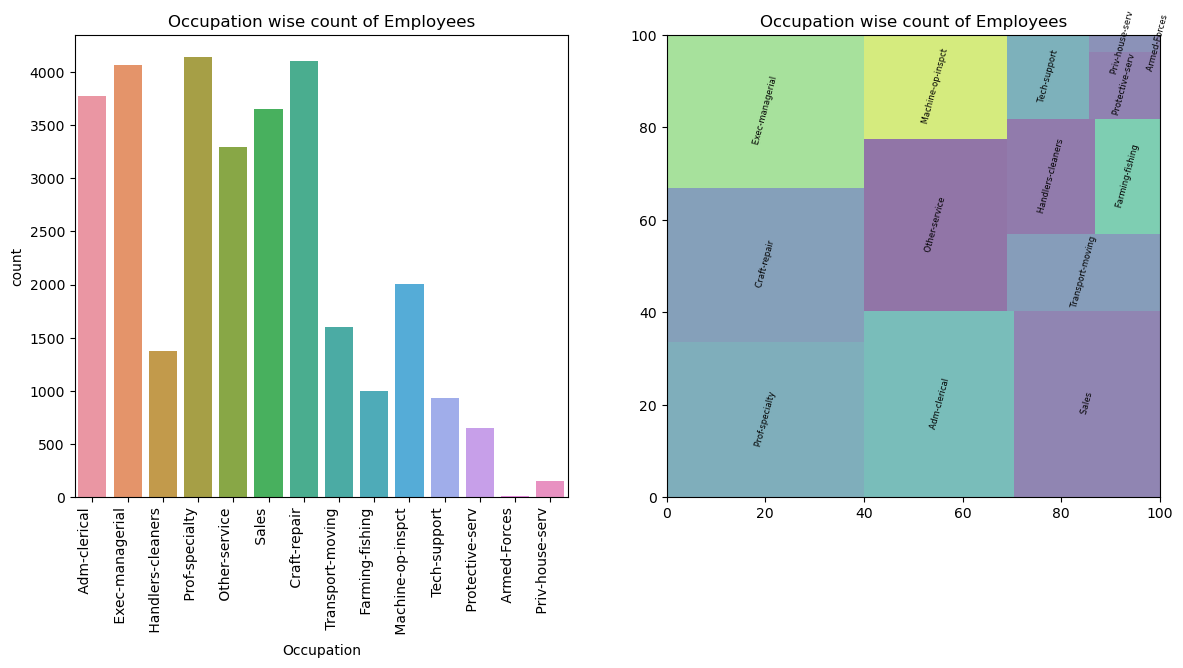

In [28]:
fig, ax = plt.subplots(1,2,figsize = (14, 6))

ax[0].set_title("Occupation wise count of Employees")
ax[1].set_title("Occupation wise count of Employees")

percentage = data["Occupation"].value_counts()         
labels = (data["Occupation"].value_counts().index).to_list()

sns.countplot(x = data["Occupation"], ax = ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 90, horizontalalignment='right')
squarify.plot(sizes=percentage, label=labels, ax=ax[1], alpha=0.6, text_kwargs={'fontsize': 6, 'rotation': 75})
plt.show()

### ***Interpretation : Most of the employees are occupied in Adm-clerical, Exec-managerial, Prof-specialty, other-service, sales, and craft-repair fields, while the remaining individuals are from various other sectors.

### Relationship

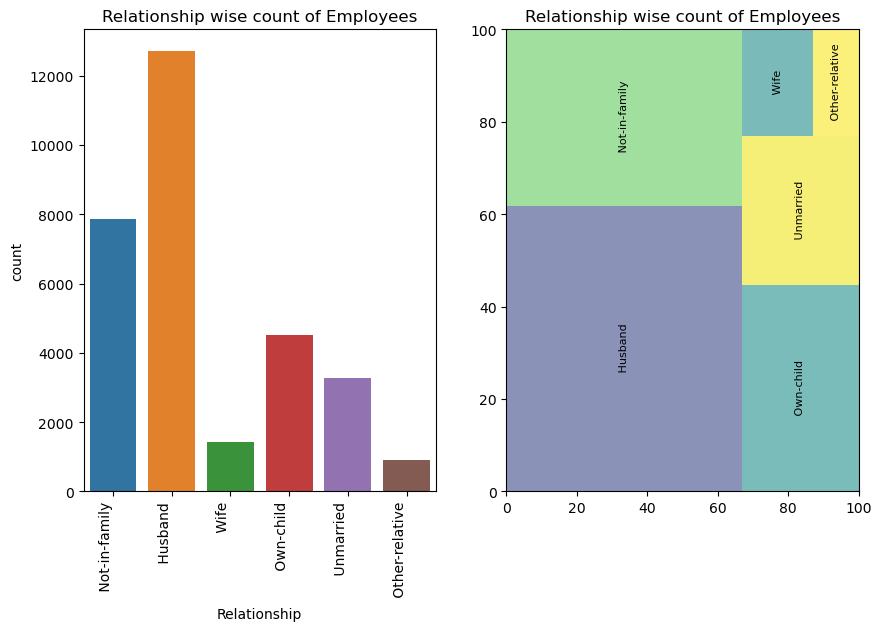

In [29]:

fig, ax = plt.subplots(1, 2, figsize = (10, 6))
ax[0].set_title("Relationship wise count of Employees")
ax[1].set_title("Relationship wise count of Employees")

percentage = data["Relationship"].value_counts()         
labels = (data["Relationship"].value_counts().index).to_list()

sns.countplot(x = data["Relationship"], ax = ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 90, horizontalalignment='right')
squarify.plot(sizes=percentage, label=labels, ax=ax[1], alpha=0.6, text_kwargs={'fontsize': 8, 'rotation': 90})
plt.show()

### ***Interpretation : Approximately 41% of employees are married males, 5% are married females, and 25% are not in a family structure. Additionally, 15% of employees have children, 11% are still unmarried, and 3% are categorized as other relatives.

### Gender

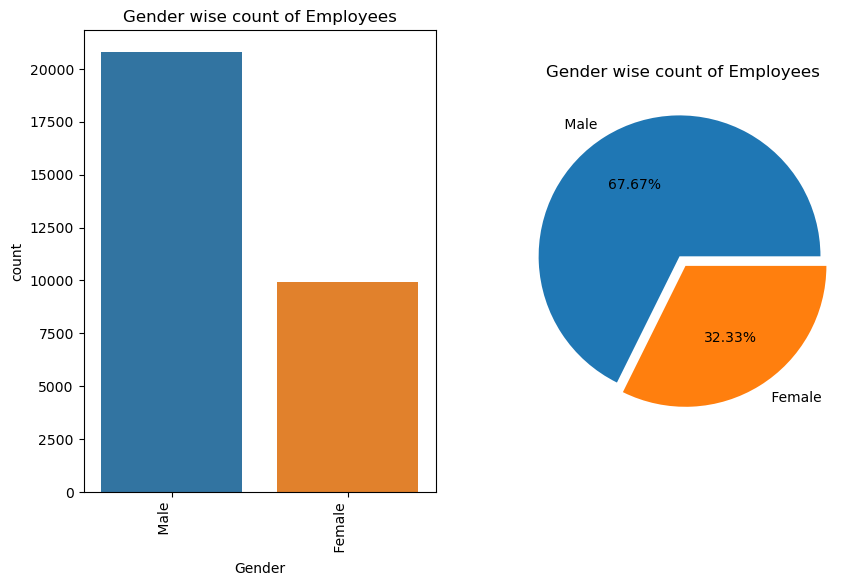

In [30]:
fig, ax = plt.subplots(1, 2, figsize = (10, 6))
ax[0].set_title("Gender wise count of Employees")
ax[1].set_title("Gender wise count of Employees")

percentage = data["Gender"].value_counts()         
labels = (data["Gender"].value_counts().index).to_list()

sns.countplot(x = data["Gender"], ax = ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 90, horizontalalignment='right')
plt.pie(percentage,explode=[0.04, 0.04],labels = labels,autopct= "%0.2f%%")
plt.show()

### ***Interpretation : The majority of employees, specifically 67%, are male, while the remaining 33% are female.

### Income_Bracket

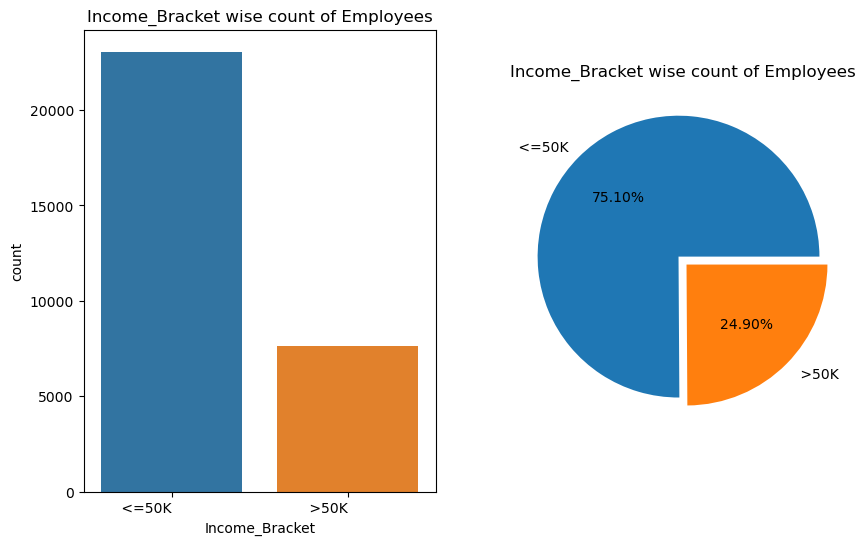

In [31]:
fig, ax = plt.subplots(1, 2, figsize = (10, 6))
ax[0].set_title("Income_Bracket wise count of Employees")
ax[1].set_title("Income_Bracket wise count of Employees")

percentage = data["Income_Bracket"].value_counts()         
labels = (data["Income_Bracket"].value_counts().index).to_list()

sns.countplot(x = data["Income_Bracket"], ax = ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), horizontalalignment='right')
plt.pie(percentage,explode=[0.04, 0.04],labels = labels,autopct= "%0.2f%%")
plt.show()

### ***Iterpretation : Approximately 76% of employees have an annual income of less than or equal to 50k, while only 24% of employees have an annual income greater than 50k.

###### 

## TASK - 5 :

### Perform descriptive analysis of each numerical column by defining a function to print the following information. 1) The measures of central tendency (mean,median). 2) The standard deviation of a variable. 3) The missing values of a variable. 4) The skewness of a variable. Perform the missing value treatment, if required.

In [32]:
def num_info(s):
    if data[s].isnull().sum() > 0:
        mean_value = data[s].mean()
        data[s].fillna(mean_value, inplace=True)

    print(f"The mean of {s} : {data[s].mean()} ")
    print(f"The median is {s} : {data[s].median()}")
    print(f"The Standard devivation of {s} : {data[s].std()}")
    print(f"Missing values in {s} are : {data[s].isnull().sum()}")
    print(f"The skewness of {s} : {data[s].skew()}")

In [33]:
num_info("Age")

The mean of Age : 38.44358356663845 
The median is Age : 37.0
The Standard devivation of Age : 13.118227411866366
Missing values in Age are : 0
The skewness of Age : 0.5316960127819774


In [34]:
num_info("Hours_Per_Week")

The mean of Hours_Per_Week : 40.94931310632202 
The median is Hours_Per_Week : 40.0
The Standard devivation of Hours_Per_Week : 11.985382031590083
Missing values in Hours_Per_Week are : 0
The skewness of Hours_Per_Week : 0.33181922705369443


In [35]:
num_info("Education_Num")

The mean of Education_Num : 10.130314473598542 
The median is Education_Num : 10.0
The Standard devivation of Education_Num : 2.562468558607318
Missing values in Education_Num are : 0
The skewness of Education_Num : -0.3103542963653389


###### 

## TASK - 6 :

### Perform descriptive analysis of the numerical columns (identified in Task 2) with the help of univariate graphs/charts. Use the histogram and box plot to visualize the numerical columns.

In [36]:
def treat_outliers(data, x):
    Q1 = data[x].quantile(0.25)
    Q3 = data[x].quantile(0.75)

    IQR = Q3 - Q1

    LF = Q1 - 1.5 * IQR
    UF = Q3 + 1.5 * IQR

    outliers = (data[x] < LF) | (data[x] > UF)

    data.loc[outliers, x] = data[x].mean()

    return data

### Age

In [37]:
treat_outliers(data,"Age")

,Age,WorkClass,Education,Education_Num,Marital_Status,Occupation,Relationship,Gender,Hours_Per_Week,Native_Country,Income_Bracket
0,39.0,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,40,United-States,<=50K
1,50.0,Self-emp,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,13,United-States,<=50K
2,38.0,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,40,United-States,<=50K
3,53.0,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,40,United-States,<=50K
4,28.0,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,Female,38,United-States,<=50K
32557,40.0,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,Male,40,United-States,>50K
32558,58.0,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,Female,40,United-States,<=50K
32559,22.0,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,Male,20,United-States,<=50K


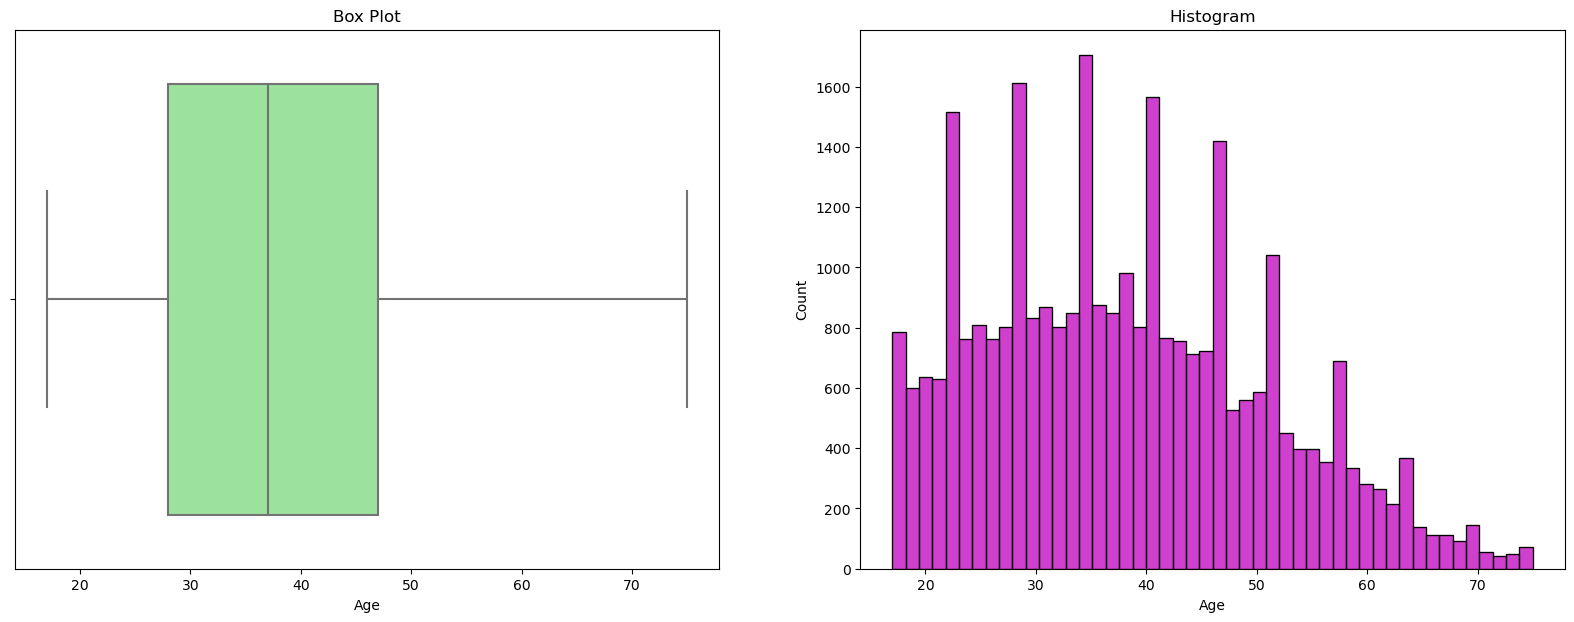

In [38]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7)) 
ax[0].set_title("Box Plot")
ax[1].set_title("Histogram")
sns.histplot(x = data["Age"], ax = ax[1], color = "m")
sns.boxplot(x = data["Age"], ax = ax[0], color = "lightgreen") 
plt.show()

### ***Interpretation : The age distribution of employees exhibits right skewness, with the majority falling between 25 and 58 years of age.

### Education_Num

In [39]:
treat_outliers(data,"Education_Num")

,Age,WorkClass,Education,Education_Num,Marital_Status,Occupation,Relationship,Gender,Hours_Per_Week,Native_Country,Income_Bracket
0,39.0,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,Male,40,United-States,<=50K
1,50.0,Self-emp,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,Male,13,United-States,<=50K
2,38.0,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,Male,40,United-States,<=50K
3,53.0,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Male,40,United-States,<=50K
4,28.0,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Female,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,Private,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,Female,38,United-States,<=50K
32557,40.0,Private,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,Male,40,United-States,>50K
32558,58.0,Private,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,Female,40,United-States,<=50K
32559,22.0,Private,HS-grad,9.0,Never-married,Adm-clerical,Own-child,Male,20,United-States,<=50K


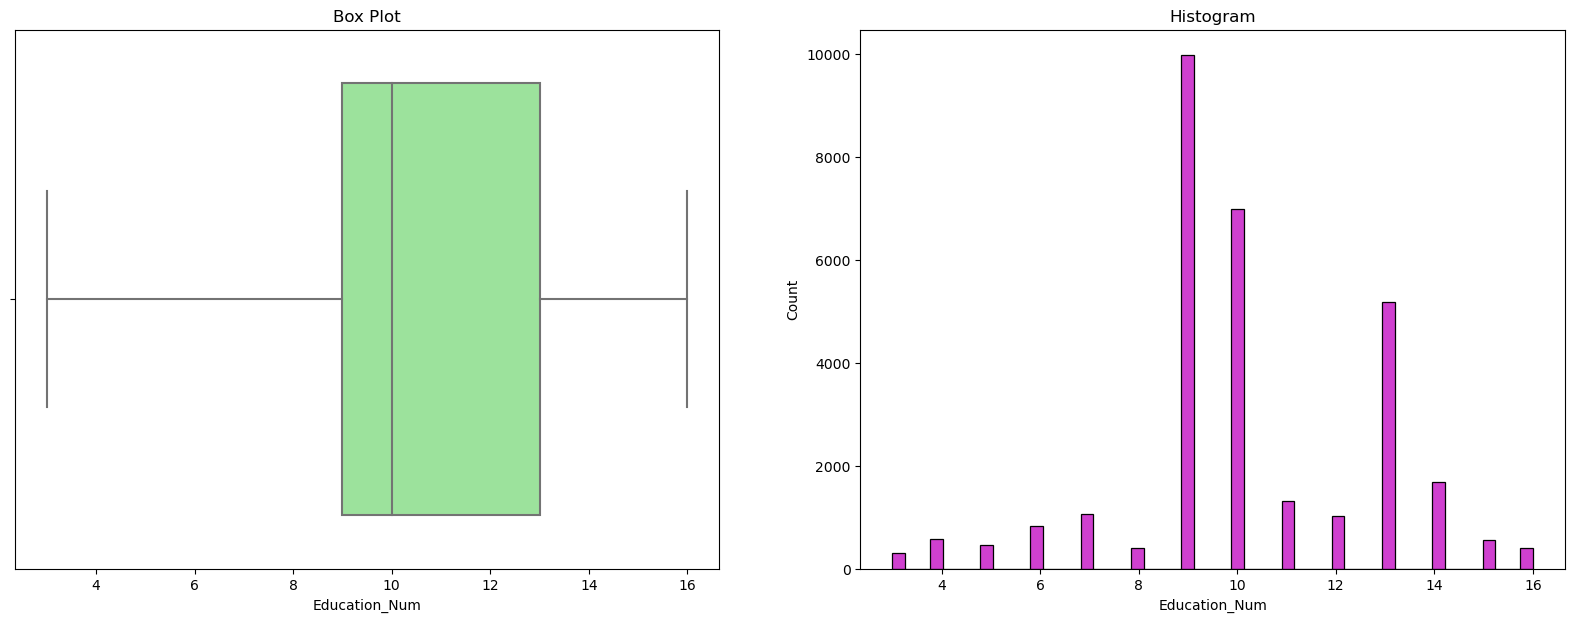

In [40]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7)) 
ax[0].set_title("Box Plot")
ax[1].set_title("Histogram")
sns.histplot(x = data["Education_Num"], ax = ax[1], color = "m")
sns.boxplot(x = data["Education_Num"], ax = ax[0], color = "lightgreen") 
plt.show()

### ***Interpretation : The distribution of Education_Num data shows left skewness.

### Hours Per Week

In [41]:
treat_outliers(data,"Hours_Per_Week")

,Age,WorkClass,Education,Education_Num,Marital_Status,Occupation,Relationship,Gender,Hours_Per_Week,Native_Country,Income_Bracket
0,39.0,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,Male,40.000000,United-States,<=50K
1,50.0,Self-emp,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,Male,40.949313,United-States,<=50K
2,38.0,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,Male,40.000000,United-States,<=50K
3,53.0,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Male,40.000000,United-States,<=50K
4,28.0,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Female,40.000000,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,Private,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,Female,38.000000,United-States,<=50K
32557,40.0,Private,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,Male,40.000000,United-States,>50K
32558,58.0,Private,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,Female,40.000000,United-States,<=50K
32559,22.0,Private,HS-grad,9.0,Never-married,Adm-clerical,Own-child,Male,40.949313,United-States,<=50K


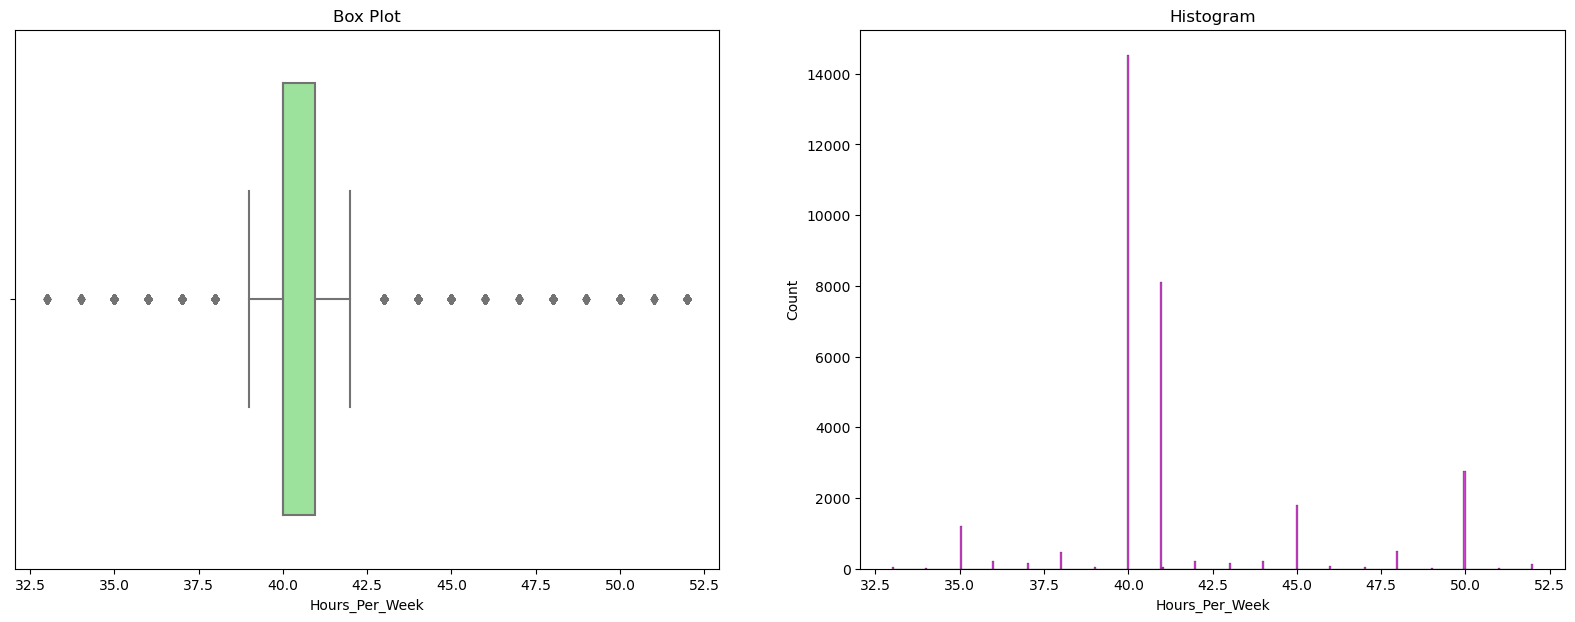

In [42]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7)) 
ax[0].set_title("Box Plot")
ax[1].set_title("Histogram")
sns.histplot(x = data["Hours_Per_Week"], ax = ax[1], color = "m")
sns.boxplot(x = data["Hours_Per_Week"], ax = ax[0], color = "lightgreen") 
plt.show()

### Interpretation : Most adults work 40 to 45 hours per week, the data on weekly working hours is highly skewed.

### 